<a href="https://colab.research.google.com/github/AashitaMehta/stockprediction/blob/main/Predicting_StockPrice_with_SC_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Task'

/content/drive/MyDrive/Task


Here, we are loading the dataset using pandas library. 

In [5]:
import pandas as pd
df = pd.read_csv("GraphData.txt")
df.head()

,Date,Time,Open,High,Low,Last,Volume,# of Trades,OHLC Avg,HLC Avg,...,DeltaRatio -2 STD,Ask Bid Trade Ratio +1 STD,Ask Bid Trade Ratio +2 STD,Ask Bid Trade Ratio -1 STD,Ask Bid Trade Ratio -2 STD,Median Ask Volume,Median Bid Volume,Ask Volume Bid Volume Difference Per Tick,Volume Above Volume POC,Volume Below Volume POC
0,2018/1/1,17:59:00.0,6405.0,6409.75,6401.50,6407.75,675.0,362.0,6406.00,6406.33,...,6411.55,0.0,0.0,0.0,6411.75,10.0,5.0,4.0,363.0,109.0
1,2018/1/1,18:01:00.0,6408.0,6412.00,6407.50,6411.25,477.0,266.0,6409.69,6410.25,...,0.00,6405.5,0.0,0.0,0.00,9.0,7.0,-1.0,95.0,228.0
2,2018/1/1,18:03:00.0,6411.5,6412.00,6411.00,6411.50,152.0,96.0,6411.50,6411.50,...,0.00,0.0,0.0,6414.0,0.00,9.0,12.0,-20.0,63.0,0.0
3,2018/1/1,18:05:00.0,6411.0,6415.00,6411.00,6415.00,177.0,136.0,6413.00,6413.67,...,0.00,6409.0,0.0,0.0,0.00,10.0,3.0,6.0,91.0,62.0
4,2018/1/1,18:07:00.0,6414.5,6415.50,6413.25,6413.50,111.0,96.0,6414.19,6414.08,...,0.00,0.0,0.0,0.0,0.00,8.0,5.0,1.0,36.0,52.0


In [6]:
df = df.iloc[:,0:7]

In [3]:
df.head()

,Date,Time,Open,High,Low,Last,Volume
0,2018/1/1,17:59:00.0,6405.0,6409.75,6401.50,6407.75,675
1,2018/1/1,18:01:00.0,6408.0,6412.00,6407.50,6411.25,477
2,2018/1/1,18:03:00.0,6411.5,6412.00,6411.00,6411.50,152
3,2018/1/1,18:05:00.0,6411.0,6415.00,6411.00,6415.00,177
4,2018/1/1,18:07:00.0,6414.5,6415.50,6413.25,6413.50,111


In [4]:
df.columns

Index(['Date', ' Time', ' Open', ' High', ' Low', ' Last', ' Volume'], dtype='object')

In [7]:
df1 = df.reset_index()[' Last']

In [6]:
df1

0        6407.75
1        6411.25
2        6411.50
3        6415.00
4        6413.50
          ...   
47420    6592.25
47421    6592.50
47422    6591.25
47423    6593.75
47424    6592.75
Name:  Last, Length: 47425, dtype: float64

In [7]:
df1.head()

0    6407.75
1    6411.25
2    6411.50
3    6415.00
4    6413.50
Name:  Last, dtype: float64

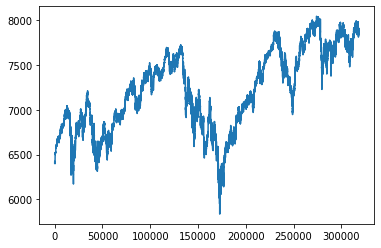

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

Here, we perform Data Normalization and convert the values to lie between 0 and 1

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [10]:
df1

array([[0.25813031],
       [0.25971671],
       [0.25983003],
       ...,
       [0.93745042],
       [0.93767705],
       [       nan]])

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
len(train_data),len(test_data)

(222975, 95561)

In [13]:
training_size

222975

For the LSTM model data needs to be entered in the form of a 3D array. Here, we are taking 100 timesteps and it is converted into array using numPy. 

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [16]:
X_train.shape , Y_train.shape

((222874, 100), (222874,))

In [17]:
X_test.shape , Y_test.shape

((95460, 100), (95460,))

In [18]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train.shape , Y_train.shape

((533804, 100, 1), (533804,))

In [19]:
X_test.shape , Y_test.shape

((95460, 100, 1), (95460,))

Here, we are importing different modules for the LSTM Module. I have added an extra module 'Dropout' and 'LSTM' which prevents overfitting along with the dropout layers.

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

Here we are adding arguments to the LSTM Layer. 
50 is the units which specifies dimensionality of the output space.
return_sequences = True is necessary for stacking the LSTM Layers so that they are in a 3-D sequence input.
input_shape defines the shape of the training set.


0.2 in the dropout layer specifies that 20% of the layers will be dropped. After this Dense Layer is added which specifies output of one unit.

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_3 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

epochs are set to 30(epochs are the number of times the learning algorithm will work through the entire training set) with a batch size of 32

In [23]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=32,verbose=1)

Epoch 1/30
6965/6965 [==============================] - 112s 15ms/step - loss: 9.8788e-04 - val_loss: 2.2804e-04
Epoch 2/30
6965/6965 [==============================] - 103s 15ms/step - loss: 2.1668e-04 - val_loss: 3.6647e-04
Epoch 3/30
6965/6965 [==============================] - 103s 15ms/step - loss: 2.0406e-04 - val_loss: 2.9655e-04
Epoch 4/30
6965/6965 [==============================] - 102s 15ms/step - loss: 1.9647e-04 - val_loss: 3.1016e-04
Epoch 5/30
6965/6965 [==============================] - 103s 15ms/step - loss: 1.8880e-04 - val_loss: 0.0012
Epoch 6/30
6965/6965 [==============================] - 103s 15ms/step - loss: 1.8582e-04 - val_loss: 0.0019
Epoch 7/30
6965/6965 [==============================] - 102s 15ms/step - loss: 1.8221e-04 - val_loss: 0.0015
Epoch 8/30
6965/6965 [==============================] - 102s 15ms/step - loss: 1.8132e-04 - val_loss: 0.0021
Epoch 9/30
6965/6965 [==============================] - 101s 15ms/step - loss: 1.7913e-04 - val_loss: 0.0013
Epo

In [24]:
model.save('stockModel.h5')

In [25]:
from keras.models import load_model

model = load_model('stockModel.h5')

In [26]:
import tensorflow as tf

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
print(train_predict)
print(test_predict)

[[0.26683405]
 [0.2666985 ]
 [0.2664327 ]
 ...
 [0.8057263 ]
 [0.80564415]
 [0.8055768 ]]
[[0.79460347]
 [0.79467386]
 [0.7946234 ]
 ...
 [0.8739177 ]
 [0.8730563 ]
 [0.87372166]]


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
print(train_predict)
print(test_predict)

[[6426.9526]
 [6426.6533]
 [6426.067 ]
 ...
 [7615.884 ]
 [7615.702 ]
 [7615.554 ]]
[[7591.3438]
 [7591.499 ]
 [7591.388 ]
 ...
 [7766.331 ]
 [7764.43  ]
 [7765.8984]]


In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

7018.4432985403655

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

7647.870023054712

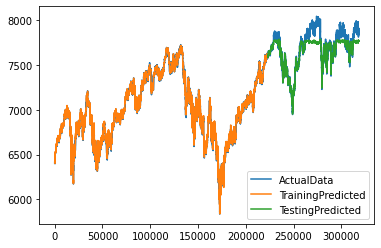

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["ActualData", "TrainingPredicted","TestingPredicted"])
plt.show()

In [34]:
df.tail()

,Date,Time,Open,High,Low,Last,Volume
318531,2019/10/23,16:43:00.0,7907.25,7908.00,7906.25,7907.0,92.0
318532,2019/10/23,16:45:00.0,7907.25,7908.25,7906.25,7907.0,87.0
318533,2019/10/23,16:47:00.0,7907.25,7907.50,7906.25,7906.5,71.0
318534,2019/10/23,16:49:00.0,7906.50,7908.00,7906.00,7907.0,69.0
318535,2019/10/23,16:,NaN,NaN,NaN,NaN,NaN


In [35]:
len(test_data)

95561

In [36]:
x_input=test_data[228717:].reshape(1,-1)
x_input.shape

(1, 0)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input


[]

In [39]:
# demonstrate prediction for next 1 hour
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} min input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: ignored

In [40]:
output = scaler.inverse_transform(lst_output)

ValueError: ignored

In [ ]:
output

array([[13169.86208463],
       [13209.38731146],
       [13244.43120825],
       [13277.79916048],
       [13309.5640353 ],
       [13340.15262604],
       [13369.92796728],
       [13399.11386529],
       [13427.81376539],
       [13456.05889638],
       [13483.84275225],
       [13511.14711621],
       [13537.96678348],
       [13564.30435644],
       [13590.17544949],
       [13615.60738781],
       [13640.63205078],
       [13665.28457078],
       [13689.60463439],
       [13713.62932578],
       [13737.39703032],
       [13760.94222981],
       [13784.29680361],
       [13807.49132991],
       [13830.55443509],
       [13853.50823954],
       [13876.37551424],
       [13899.17512658],
       [13921.92269096],
       [13944.63121936]])

In [ ]:
df.tail()

,Date,Time,Open,High,Low,Last,Volume
762717,2022/5/3,01:17:00.0,13140.75,13145.25,13137.0,13140.00,174
762718,2022/5/3,01:19:00.0,13140.50,13141.50,13132.5,13133.50,97
762719,2022/5/3,01:21:00.0,13133.50,13135.00,13130.5,13133.50,44
762720,2022/5/3,01:23:00.0,13133.00,13137.25,13130.5,13135.00,86
762721,2022/5/3,01:25:00.0,13135.50,13136.75,13126.5,13131.75,171


In [ ]:
d = "2022/5/3"
t = "01:25:00.0"
a = d.split("/")

In [ ]:
a[0]

'2022'

In [ ]:
listdates=["2022/5/3"]
listtimes=["01:25:00.0"]

In [ ]:
df.columns

Index(['Date', ' Time', ' Open', ' High', ' Low', ' Last', ' Volume'], dtype='object')

In [ ]:
from datetime import datetime
from datetime import timedelta

for i in range(0,30):
  d = listdates[-1]
  t = listtimes[-1]
  a = d.split("/")

  time_str = a[2]+"/"+a[1]+"/"+a[0]+ " " + t
  date_format_str = '%d/%m/%Y %H:%M:%S.%f'
  given_time = datetime.strptime(time_str, date_format_str)
  n = 2
  final_time = given_time + timedelta(minutes=n)
  final_time_str = final_time.strftime('%d/%m/%Y %H:%M:%S.%f')
  keep = final_time_str.split(" ")
  main = keep[0].split("/")
  final = "".join(main[2]+"/"+main[1]+"/"+main[0])
  listdates.append(final)
  listtimes.append(keep[1])

In [ ]:
listtimes.pop(0)

'01:25:00.0'

In [ ]:
listdates.pop(0)

'2022/5/3'

In [ ]:
listtimes

['01:27:00.000000',
 '01:29:00.000000',
 '01:31:00.000000',
 '01:33:00.000000',
 '01:35:00.000000',
 '01:37:00.000000',
 '01:39:00.000000',
 '01:41:00.000000',
 '01:43:00.000000',
 '01:45:00.000000',
 '01:47:00.000000',
 '01:49:00.000000',
 '01:51:00.000000',
 '01:53:00.000000',
 '01:55:00.000000',
 '01:57:00.000000',
 '01:59:00.000000',
 '02:01:00.000000',
 '02:03:00.000000',
 '02:05:00.000000',
 '02:07:00.000000',
 '02:09:00.000000',
 '02:11:00.000000',
 '02:13:00.000000',
 '02:15:00.000000',
 '02:17:00.000000',
 '02:19:00.000000',
 '02:21:00.000000',
 '02:23:00.000000',
 '02:25:00.000000']

In [ ]:
listdates

['2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03',
 '2022/05/03']

In [ ]:
listtrends=['Up']

for i in range(1,len(output)):

  if output[i] > output[i-1]:
    listtrends.append('Up')

  elif output[i] < output[i-1]:
    listtrends.append('Bottom')

  else:
    listtrends.append('Flat')

In [ ]:
listtrends

['Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up']

In [ ]:
lst_output

[[0.6716852188110352],
 [0.6753063201904297],
 [0.6785168647766113],
 [0.6815738677978516],
 [0.6844840049743652],
 [0.687286376953125],
 [0.6900142431259155],
 [0.6926881074905396],
 [0.6953174471855164],
 [0.6979051232337952],
 [0.7004505395889282],
 [0.7029520273208618],
 [0.7054091095924377],
 [0.7078220248222351],
 [0.7101922035217285],
 [0.7125221490859985],
 [0.7148147821426392],
 [0.7170733213424683],
 [0.7193014025688171],
 [0.721502423286438],
 [0.7236799001693726],
 [0.725836992263794],
 [0.7279766201972961],
 [0.7301015853881836],
 [0.7322145104408264],
 [0.734317421913147],
 [0.7364124059677124],
 [0.7385011911392212],
 [0.740585207939148],
 [0.7426656484603882]]

In [ ]:
listdates , listtimes , listtrends , lst_output

(['2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03',
  '2022/05/03'],
 ['01:27:00.000000',
  '01:29:00.000000',
  '01:31:00.000000',
  '01:33:00.000000',
  '01:35:00.000000',
  '01:37:00.000000',
  '01:39:00.000000',
  '01:41:00.000000',
  '01:43:00.000000',
  '01:45:00.000000',
  '01:47:00.000000',
  '01:49:00.000000',
  '01:51:00.000000',
  '01:53:00.000000',
  '01:55:00.000000',
  '01:57:00.000000',
  '01:59:00.000000',
  '02:01:00.000000',
  '02:03:00.000000',
  '02:05:00.000000',
  '02:07:00.000000',
  '02:09:00.000000',
  '02:11:00.000000',
  '02:13:00.000000',
  '02:15:00.000

In [ ]:
len(listdates) , len(listtimes), len(listtrends) , len(lst_output)

(30, 30, 30, 30)

In [ ]:
import pandas as pd
finaldf = pd.DataFrame({'Date':listdates,
                        'Time':listtimes,
                        'Trend':listtrends,
                        'Future Close Price':list(output),
                        'strength':lst_output
                        ,})

In [ ]:
finaldf

,Date,Time,Trend,Future Close Price,strength
0,2022/05/03,01:27:00.000000,Up,[13169.862084627151],[0.6716852188110352]
1,2022/05/03,01:29:00.000000,Up,[13209.387311458588],[0.6753063201904297]
2,2022/05/03,01:31:00.000000,Up,[13244.431208252907],[0.6785168647766113]
3,2022/05/03,01:33:00.000000,Up,[13277.7991604805],[0.6815738677978516]
4,2022/05/03,01:35:00.000000,Up,[13309.56403529644],[0.6844840049743652]
5,2022/05/03,01:37:00.000000,Up,[13340.152626037598],[0.687286376953125]
6,2022/05/03,01:39:00.000000,Up,[13369.92796728015],[0.6900142431259155]
7,2022/05/03,01:41:00.000000,Up,[13399.113865286112],[0.6926881074905396]
8,2022/05/03,01:43:00.000000,Up,[13427.813765391707],[0.6953174471855164]
9,2022/05/03,01:45:00.000000,Up,[13456.058896377683],[0.6979051232337952]


In [ ]:
testing_inp = train_data[533805:].reshape(1,-1)
testing_inp.shape

(1, 100)

In [ ]:
start_date = '2021/1/18'
start_time = '01:09:00.0'
n = 228817
close_price = df.iloc[533905:,5]

In [ ]:
import numpy
p = numpy.squeeze(output)

In [ ]:
df[533905:]

,Date,Time,Open,High,Low,Last,Volume
533905,2021/1/18,01:09:00.0,12778.00,12780.00,12776.50,12779.00,29
533906,2021/1/18,01:11:00.0,12777.25,12779.50,12776.50,12776.50,35
533907,2021/1/18,01:13:00.0,12775.25,12777.75,12775.25,12775.75,22
533908,2021/1/18,01:15:00.0,12777.00,12778.00,12775.50,12776.50,39
533909,2021/1/18,01:17:00.0,12777.25,12777.75,12776.25,12777.75,14
...,...,...,...,...,...,...,...
762717,2022/5/3,01:17:00.0,13140.75,13145.25,13137.00,13140.00,174
762718,2022/5/3,01:19:00.0,13140.50,13141.50,13132.50,13133.50,97
762719,2022/5/3,01:21:00.0,13133.50,13135.00,13130.50,13133.50,44
762720,2022/5/3,01:23:00.0,13133.00,13137.25,13130.50,13135.00,86


In [ ]:
finallistdates = ["2021/1/18"]
finallisttimes = ["01:09:00.0"]

In [ ]:
from datetime import datetime
from datetime import timedelta

for i in range(0,n):
  d = finallistdates[-1]
  t = finallisttimes[-1]
  a = d.split("/")

  time_str = a[2]+"/"+a[1]+"/"+a[0]+ " " + t
  date_format_str = '%d/%m/%Y %H:%M:%S.%f'
  given_time = datetime.strptime(time_str, date_format_str)
  final_time = given_time + timedelta(minutes=2)
  final_time_str = final_time.strftime('%d/%m/%Y %H:%M:%S.%f')
  keep = final_time_str.split(" ")
  main = keep[0].split("/")
  final = "".join(main[2]+"/"+main[1]+"/"+main[0])
  finallistdates.append(final)
  finallisttimes.append(keep[1])

In [ ]:
finallistdates[-1]

'2021/12/01'

In [ ]:
finallisttimes[-1]

'20:23:00.000000'

In [ ]:
finallistdates = list(df.iloc[534006:,0])
finallisttimes = list(df.iloc[534006:,1])
finallistcloseprice = list(df.iloc[534006:,5])


In [ ]:
len(df[534005:])

228717

In [ ]:
finalactualtrends=['Up']

for i in range(1,len(finallistcloseprice)):

  if finallistcloseprice[i] > finallistcloseprice[i-1]:
    finalactualtrends.append('Up')

  elif finallistcloseprice[i] < finallistcloseprice[i-1]:
    finalactualtrends.append('Bottom')

  else:
    finalactualtrends.append('Flat')

In [ ]:
len(test_predict)

228716

In [ ]:
len(finallistdates)

228716

In [ ]:
len(train_data),len(test_data)

(533905, 228817)

In [ ]:
len(train_predict)

533804

In [ ]:
len(Y_train),len(train_predict)

(533804, 533804)

In [ ]:
len(Y_test),len(test_predict)

(228716, 228716)

In [ ]:
len(test_predict)

228716

In [ ]:
df[533905:]

,Date,Time,Open,High,Low,Last,Volume
533905,2021/1/18,01:09:00.0,12778.00,12780.00,12776.50,12779.00,29
533906,2021/1/18,01:11:00.0,12777.25,12779.50,12776.50,12776.50,35
533907,2021/1/18,01:13:00.0,12775.25,12777.75,12775.25,12775.75,22
533908,2021/1/18,01:15:00.0,12777.00,12778.00,12775.50,12776.50,39
533909,2021/1/18,01:17:00.0,12777.25,12777.75,12776.25,12777.75,14
...,...,...,...,...,...,...,...
762717,2022/5/3,01:17:00.0,13140.75,13145.25,13137.00,13140.00,174
762718,2022/5/3,01:19:00.0,13140.50,13141.50,13132.50,13133.50,97
762719,2022/5/3,01:21:00.0,13133.50,13135.00,13130.50,13133.50,44
762720,2022/5/3,01:23:00.0,13133.00,13137.25,13130.50,13135.00,86


In [ ]:
test_predict

array([[12821.024 ],
       [12821.801 ],
       [12820.384 ],
       ...,
       [13177.087 ],
       [13171.1455],
       [13171.976 ]], dtype=float32)

In [ ]:
dummy = scaler.inverse_transform(X_test.reshape(1,-1))
len(dummy[0])

22871600

In [ ]:
len(test_predict)

228716

In [ ]:
finalpredictedcloseprice = test_predict

In [ ]:
finalpredictedtrends = ['Up']

for i in range(1,len(finalpredictedcloseprice)):

  if finalpredictedcloseprice[i] > finalpredictedcloseprice[i-1]:
    finalpredictedtrends.append('Up')

  elif finalpredictedcloseprice[i] < finalpredictedcloseprice[i-1]:
    finalpredictedtrends.append('Bottom')

  else:
    finalpredictedtrends.append('Flat')

In [ ]:
len(finalpredictedtrends)

228716

In [ ]:
type(listtrends)

list

In [ ]:
type(finalpredictedtrends)

list

In [ ]:
finalpredictedtrends = list(finalpredictedtrends)

In [ ]:
#For strength

In [ ]:
df2 = pd.DataFrame(df.reset_index()[' Last'])

In [ ]:
df2

,Last
0,6407.75
1,6411.25
2,6411.50
3,6415.00
4,6413.50
...,...
762717,13140.00
762718,13133.50
762719,13133.50
762720,13135.00


In [ ]:
df2['diff'] = df2.diff(1)
df2

,Last,diff
0,6407.75,NaN
1,6411.25,3.50
2,6411.50,0.25
3,6415.00,3.50
4,6413.50,-1.50
...,...,...
762717,13140.00,-1.00
762718,13133.50,-6.50
762719,13133.50,0.00
762720,13135.00,1.50


In [ ]:
df2['diff']

0          NaN
1         3.50
2         0.25
3         3.50
4        -1.50
          ... 
762717   -1.00
762718   -6.50
762719    0.00
762720    1.50
762721   -3.25
Name: diff, Length: 762722, dtype: float64

In [ ]:
df2['gain'] = df2['diff'].clip(lower=0).round(2)
df2['loss'] = df2['diff'].clip(upper=0).abs().round(2)


In [ ]:
df2

,Last,diff,gain,loss
0,6407.75,NaN,NaN,NaN
1,6411.25,3.50,3.50,0.00
2,6411.50,0.25,0.25,0.00
3,6415.00,3.50,3.50,0.00
4,6413.50,-1.50,0.00,1.50
...,...,...,...,...
762717,13140.00,-1.00,0.00,1.00
762718,13133.50,-6.50,0.00,6.50
762719,13133.50,0.00,0.00,0.00
762720,13135.00,1.50,1.50,0.00


In [ ]:
window_length=100
df2['avg_gain'] = df2['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
df2['avg_loss'] = df2['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]

In [ ]:
for i, row in enumerate(df2['avg_gain'].iloc[window_length+1:]):
    df2['avg_gain'].iloc[i + window_length + 1] =\
        (df2['avg_gain'].iloc[i + window_length] *
         (window_length - 1) +
         df2['gain'].iloc[i + window_length + 1])\
        / window_length
# Average Losses
for i, row in enumerate(df2['avg_loss'].iloc[window_length+1:]):
    df2['avg_loss'].iloc[i + window_length + 1] =\
        (df2['avg_loss'].iloc[i + window_length] *
         (window_length - 1) +
         df2['loss'].iloc[i + window_length + 1])\
        / window_length


In [ ]:
df2['rs'] = df2['avg_gain'] / df2['avg_loss']


In [ ]:
df2['rsi'] = 100 - (100 / (1.0 + df2['rs']))
# View Result
print(df2)

            Last  diff  gain  loss  avg_gain  avg_loss        rs        rsi
0        6407.75   NaN   NaN   NaN       NaN       NaN       NaN        NaN
1        6411.25  3.50  3.50  0.00       NaN       NaN       NaN        NaN
2        6411.50  0.25  0.25  0.00       NaN       NaN       NaN        NaN
3        6415.00  3.50  3.50  0.00       NaN       NaN       NaN        NaN
4        6413.50 -1.50  0.00  1.50       NaN       NaN       NaN        NaN
...          ...   ...   ...   ...       ...       ...       ...        ...
762717  13140.00 -1.00  0.00  1.00  2.458924  2.020018  1.217278  54.899658
762718  13133.50 -6.50  0.00  6.50  2.434334  2.064818  1.178958  54.106513
762719  13133.50  0.00  0.00  0.00  2.409991  2.044170  1.178958  54.106513
762720  13135.00  1.50  1.50  0.00  2.400891  2.023728  1.186370  54.262098
762721  13131.75 -3.25  0.00  3.25  2.376882  2.035991  1.167433  53.862467

[762722 rows x 8 columns]


In [ ]:
df2['rsi']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
96           NaN
97           NaN
98           NaN
99           NaN
100    62.083333
Name:  Last, Length: 101, dtype: float64

In [ ]:
len(finallistdates) ,len(finallisttimes) , len(finallistcloseprice) , len(finalactualtrends) , len(finalpredictedcloseprice) , len(finalpredictedtrends)

(228716, 228716, 228716, 228716, 228716, 228716)

In [ ]:
finalliststrength = list(df2.iloc[534006:,7])

In [ ]:
len(finalliststrength)

228716

In [ ]:
total_df = pd.DataFrame({'Date':finallistdates,
                        'Time':finallisttimes,
                        'Actual Close Price':finallistcloseprice,
                        'Actual Trend': finalactualtrends,
                        'strength':finalliststrength,
                        'Predicted Close Price':list(finalpredictedcloseprice),
                        'Predicted Trend':finalpredictedtrends})

In [ ]:
total_df

,Date,Time,Actual Close Price,Actual Trend,strength,Predicted Close Price,Predicted Trend
0,2021/1/18,04:31:00.0,12783.75,Up,51.540493,[12821.024],Up
1,2021/1/18,04:33:00.0,12784.00,Up,51.601824,[12821.801],Up
2,2021/1/18,04:35:00.0,12785.25,Up,51.909217,[12820.384],Bottom
3,2021/1/18,04:37:00.0,12785.00,Bottom,51.842697,[12820.87],Up
4,2021/1/18,04:39:00.0,12783.00,Bottom,51.311359,[12822.038],Up
...,...,...,...,...,...,...,...
228711,2022/5/3,01:17:00.0,13140.00,Bottom,54.899658,[13170.867],Up
228712,2022/5/3,01:19:00.0,13133.50,Bottom,54.106513,[13178.624],Up
228713,2022/5/3,01:21:00.0,13133.50,Flat,54.106513,[13177.087],Bottom
228714,2022/5/3,01:23:00.0,13135.00,Up,54.262098,[13171.1455],Bottom


In [ ]:
from sklearn.metrics import precision_score
precision_score(finalactualtrends,finalpredictedtrends,average='macro')

0.3287690192564652